In [4]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 42

In [5]:
df = pd.read_csv("training_malicious_url.csv")
# df.head()

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])

In [7]:
# Exclude the target column
features = [x for x in df.columns if x != 'Type']  # Exclude 'type' column
print(len(features))

7


In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 1440
validation samples: 360
target proportion: 0.5014


In [9]:
# Building decision tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

min_samples_split=2, Train Accuracy=0.9924, Validation Accuracy=0.8556
min_samples_split=10, Train Accuracy=0.9500, Validation Accuracy=0.8722
min_samples_split=30, Train Accuracy=0.9062, Validation Accuracy=0.8528
min_samples_split=50, Train Accuracy=0.8819, Validation Accuracy=0.8417
min_samples_split=100, Train Accuracy=0.8681, Validation Accuracy=0.8444
min_samples_split=200, Train Accuracy=0.8389, Validation Accuracy=0.8139
min_samples_split=300, Train Accuracy=0.8236, Validation Accuracy=0.8000
min_samples_split=700, Train Accuracy=0.8063, Validation Accuracy=0.7611


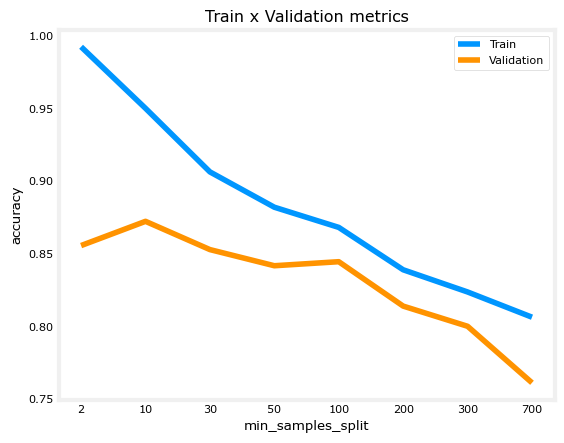

In [10]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = DecisionTreeClassifier(min_samples_split=min_samples_split,
                                   random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

max_depth=1, Train Accuracy=0.7194, Validation Accuracy=0.6917
max_depth=2, Train Accuracy=0.7708, Validation Accuracy=0.7167
max_depth=3, Train Accuracy=0.8111, Validation Accuracy=0.7639
max_depth=4, Train Accuracy=0.8347, Validation Accuracy=0.7778
max_depth=8, Train Accuracy=0.9181, Validation Accuracy=0.8556
max_depth=16, Train Accuracy=0.9896, Validation Accuracy=0.8556
max_depth=32, Train Accuracy=0.9924, Validation Accuracy=0.8556
max_depth=64, Train Accuracy=0.9924, Validation Accuracy=0.8556
max_depth=None, Train Accuracy=0.9924, Validation Accuracy=0.8556


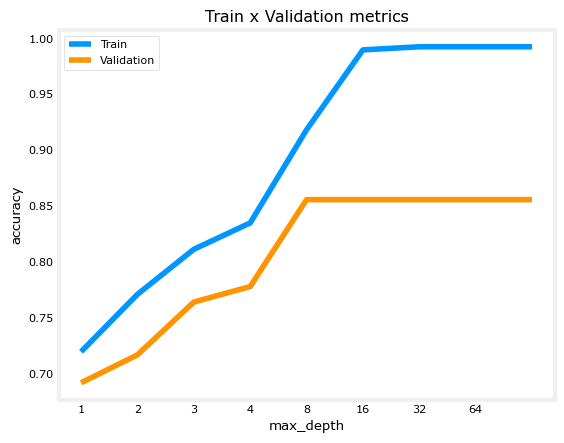

In [11]:
accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train','Validation'])

In [12]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 10,
                                             max_depth = 8,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [13]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9111
Metrics validation:
	Accuracy score: 0.8556
